# Reading multiple files
Currently support reading multiple depletion and detector files to obtain true expected quantities and uncertaintines. These are done with the [`sampler`](http://serpent-tools.readthedocs.io/en/latest/api/sampler.html) module.
The directories `models/sampled-bwr/dep` and `models/sampled-bwr/det` contain depletion and detector outputs from 100 repeated runs, e.g. only differ by random seed. Only five of such files are tracked in this repository as to not overburden the user, but the approach still applies

The readers follow the same data structure and retrieval as their serial counterparts.

In [1]:
%matplotlib inline
detGlob = '../models/sampled-bwr/det/bwr_*_det0.m'
depGlob = '../models/sampled-bwr/dep/bwr_*_dep.m'

## Detector

In [2]:
from serpentTools.samplers.detector import DetectorSampler

In [3]:
%time
det = DetectorSampler(detGlob)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs


In [4]:
len(det.files), len(det.parsers)

(100, 100)

In [5]:
det.detectors

{'spectrum': <serpentTools.samplers.detector.SampledDetector at 0x7f88388f3b38>}

New [`SampledDetector`](http://serpent-tools.readthedocs.io/en/latest/api/sampler.html#serpentTools.samplers.detector.SampledDetector) objects behave exactly like their standalone counterparts. The relative error attribute is replaced with the aggregation of the errors from all files read.

In [6]:
s = det.detectors['spectrum']

In [7]:
s.tallies

array([4.90556600e-05, 1.20874733e-03, 1.21312464e-03, 3.61042520e-03,
       2.86406860e-03, 3.74714340e-03, 6.36568610e-03, 6.09158910e-03,
       7.69617980e-03, 2.68632020e-02, 2.27470030e-02, 7.25810390e-02,
       8.86931130e-02, 6.96722780e-01, 2.39976360e-01, 5.16551710e-01,
       5.07397990e-01, 4.87760290e-01, 4.60922870e-01, 4.31440990e-01,
       3.98877820e-01, 3.65974230e-01, 7.75709650e-01, 6.07434370e-01,
       4.63728910e-01, 3.63129940e-01, 2.78595290e-01, 2.19779910e-01,
       1.78470170e-01, 1.45680180e-01, 1.19150270e-01, 1.02497258e-01,
       9.08375390e-02, 8.14357980e-02, 1.39519240e-01, 1.18152750e-01,
       1.01674162e-01, 9.05240530e-02, 4.21298450e-02, 3.98024740e-02,
       7.41321130e-02, 6.81187060e-02, 6.28304510e-02, 5.89792840e-02,
       5.49784900e-02, 2.64519260e-02, 2.55670490e-02, 2.45027080e-02,
       2.39173790e-02, 9.30118580e-03, 9.07457830e-03, 9.16113510e-03,
       9.07904240e-03, 9.00869980e-03, 8.84058960e-03, 8.71364110e-03,
      

Information from all standalone detectors used to create this one are retained through the `allTallies` and `allErrors` attributes. These are identical to the `tallies` and `errors` arrays with an additional dimension for the parser index.

In [8]:
s.allTallies.shape

(100, 238)

In [9]:
s.indexes

OrderedDict([('energy',
              array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
                      13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
                      26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
                      39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
                      52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
                      65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
                      78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
                      91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
                     104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
                     117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
                     130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
                     143, 144,

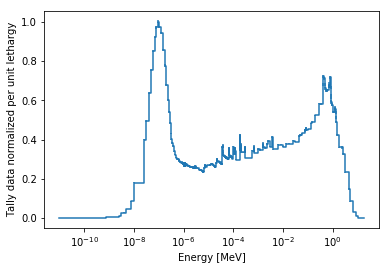

In [10]:
s.spectrumPlot();

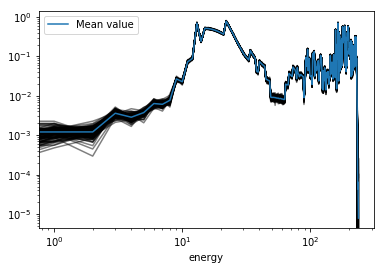

In [11]:
s.spreadPlot('energy', loglog=True);

## Depletion

In [12]:
from serpentTools.samplers.depletion import DepletionSampler

In [13]:
%time
dep = DepletionSampler(depGlob)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


In [14]:
len(dep.parsers), len(dep.files)

(100, 100)

In [15]:
dep.materials

{'fue1': <serpentTools.samplers.depletion.SampledDepletedMaterial at 0x7f8811ba68d0>,
 'fue2': <serpentTools.samplers.depletion.SampledDepletedMaterial at 0x7f8811c70668>,
 'fue3': <serpentTools.samplers.depletion.SampledDepletedMaterial at 0x7f8811c6e0b8>,
 'fue4': <serpentTools.samplers.depletion.SampledDepletedMaterial at 0x7f88122abf60>,
 'fueG': <serpentTools.samplers.depletion.SampledDepletedMaterial at 0x7f88122ab9b0>,
 'total': <serpentTools.samplers.depletion.SampledDepletedMaterial at 0x7f8811baa048>}

In [16]:
dep.metadata.keys()

dict_keys(['names', 'zai', 'days', 'burnup'])

In [17]:
dep.metadata['names']

['U235',
 'Pu239',
 'Pu240',
 'Pu241',
 'Am241',
 'Am243',
 'Gd155',
 'Gd157',
 'Xe135',
 'Sm149',
 'I131',
 'Cs134',
 'Cs137',
 'lost',
 'total']

In [18]:
fuel = dep.materials['fue1']
fuel.getValues('days', 'adens')

array([[1.43700000e-03, 1.13612620e-03, 6.97673550e-04, 1.16838680e-04],
       [0.00000000e+00, 1.58973200e-08, 1.33327330e-07, 2.82684350e-07],
       [0.00000000e+00, 9.43668130e-08, 1.72145370e-06, 1.23170630e-05],
       [0.00000000e+00, 3.30524900e-08, 1.25109520e-06, 9.61663130e-06],
       [0.00000000e+00, 7.34901450e-15, 6.55509930e-13, 6.33313610e-12],
       [0.00000000e+00, 1.87641600e-13, 1.54275543e-10, 1.97187660e-08],
       [0.00000000e+00, 6.10994820e-15, 5.74739890e-15, 2.50367960e-15],
       [0.00000000e+00, 3.40950510e-12, 1.10792230e-11, 1.68069260e-11],
       [0.00000000e+00, 1.00795562e-09, 1.15751660e-09, 6.06671450e-10],
       [0.00000000e+00, 9.04995440e-12, 3.22262860e-11, 1.90446720e-11],
       [0.00000000e+00, 2.04392540e-07, 2.03203310e-06, 9.11950340e-06],
       [0.00000000e+00, 3.25383290e-11, 7.46433520e-11, 2.03426060e-10],
       [0.00000000e+00, 1.02598440e-05, 3.39588680e-05, 7.12210300e-05],
       [0.00000000e+00, 1.71521880e-11, 4.22074930e

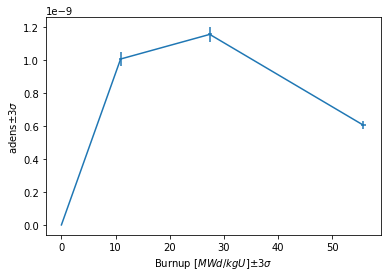

In [19]:
ax = fuel.plot('burnup', 'adens', names='Xe135');

In [20]:
fuel.uncertainties.keys()

dict_keys(['volume', 'burnup', 'adens', 'mdens', 'a', 'h', 'sf', 'gsrc', 'ingTox', 'inhTox'])

In [21]:
fuel.uncertainties['adens']

array([[3.03576608e-18, 2.26974394e-06, 3.44080552e-06, 2.18655835e-06],
       [0.00000000e+00, 3.23706362e-10, 2.48496303e-09, 5.30127531e-09],
       [0.00000000e+00, 3.47917314e-09, 7.87927424e-08, 7.68550500e-07],
       [0.00000000e+00, 2.62768338e-09, 6.70927895e-08, 2.88147205e-07],
       [0.00000000e+00, 5.98906501e-16, 3.57298744e-14, 2.21914129e-13],
       [0.00000000e+00, 3.69273294e-14, 2.59925614e-11, 2.36500774e-09],
       [0.00000000e+00, 1.71291127e-16, 1.86526023e-16, 8.21931890e-17],
       [0.00000000e+00, 6.84787059e-14, 1.92939727e-13, 3.36373181e-13],
       [0.00000000e+00, 1.36909946e-11, 1.44758623e-11, 8.35771945e-12],
       [0.00000000e+00, 1.29927961e-13, 6.29993256e-13, 3.94630074e-13],
       [0.00000000e+00, 1.56600956e-09, 1.01487090e-08, 2.33333065e-08],
       [0.00000000e+00, 5.66716837e-13, 8.62746106e-13, 7.45550899e-12],
       [0.00000000e+00, 7.75100604e-08, 1.57614462e-07, 1.60347848e-07],
       [0.00000000e+00, 3.01581743e-13, 5.38260925e

[`SampledDepletedMaterial`](http://serpent-tools.readthedocs.io/en/latest/api/sampler.html#serpentTools.samplers.depletion.SampledDepletedMaterial)  can plot the mean value and show the spread of values from each unique reader. 

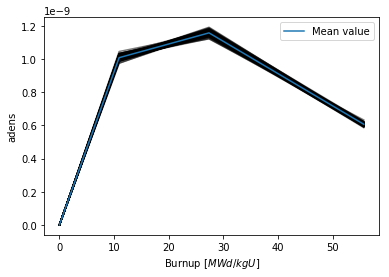

In [22]:
ax = fuel.spreadPlot('burnup', 'adens',  'Xe135', logy=False)

## Settings
A few settings control how the samplers behave and can improve analysis by:

1. Skipping a precheck that ensures all sampled parsers have the same data - [`sampler.skipPrecheck`](http://serpent-tools.readthedocs.io/en/latest/settingsTop.html#sampler-skipprecheck)
1. Not retaining individual samplers after final processing - [`sampler.freeAll`](http://serpent-tools.readthedocs.io/en/latest/settingsTop.html#sampler-freeall)

This does eliminate some functionality, such as `spreadPlots`, which require all parsers and sampled containers to be retained

In [23]:
from serpentTools .settings import rc
from serpentTools.messages import SamplerError
rc.setValue('sampler.freeAll', True)

In [24]:
detF = DetectorSampler(detGlob)

In [25]:
detF.parsers

set()

In [26]:
sF= detF.detectors['spectrum']
print(sF.allTallies is None)

True


In [27]:
try:
# catch and print the error raised with this method    
    sF.spreadPlot()
except SamplerError as se: 
    print(se)

Data from all sampled files has been freed and cannot be used in this plot method
